## House price prediction

### Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Acquisition & Description

In [3]:
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\House_price\\train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2. Exploratory Data Analysis (EDA)

In [8]:
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values()

In [9]:
correlation

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
target_corr = corr_matrix['SalePrice'].sort_values(ascending=True)

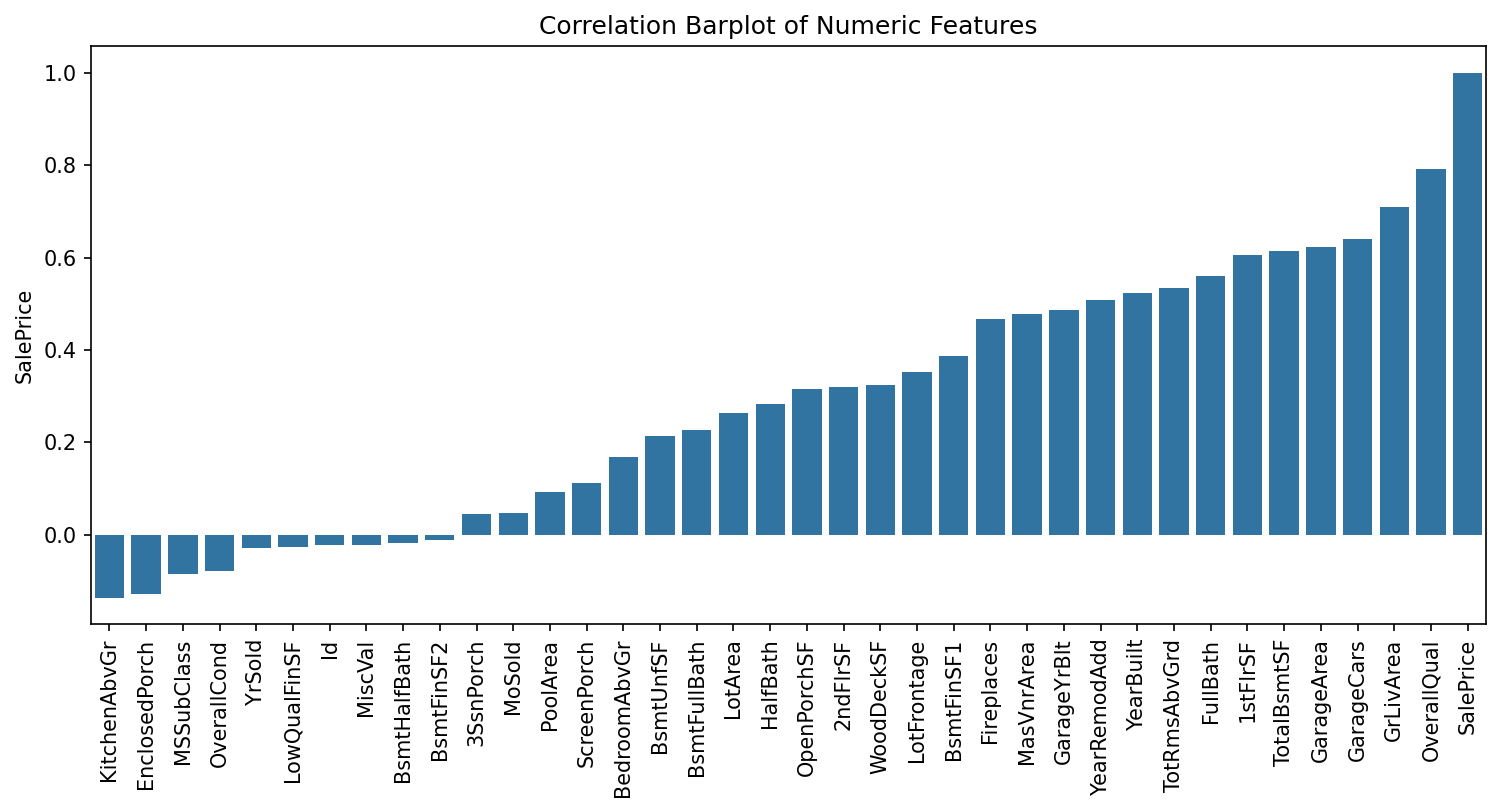

In [19]:
plt.figure(figsize=(12,5),dpi=150)
sns.barplot(target_corr)
plt.title('Correlation Barplot of Numeric Features')
plt.xticks(rotation=90);

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

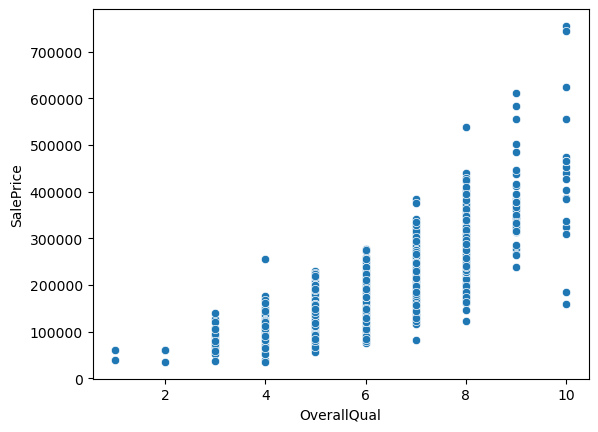

In [20]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

In [21]:
df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)]
# Identify potential outliers: points with OverallQual =10 and SalePrice < 200000

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [23]:
potential_outliers=df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)]

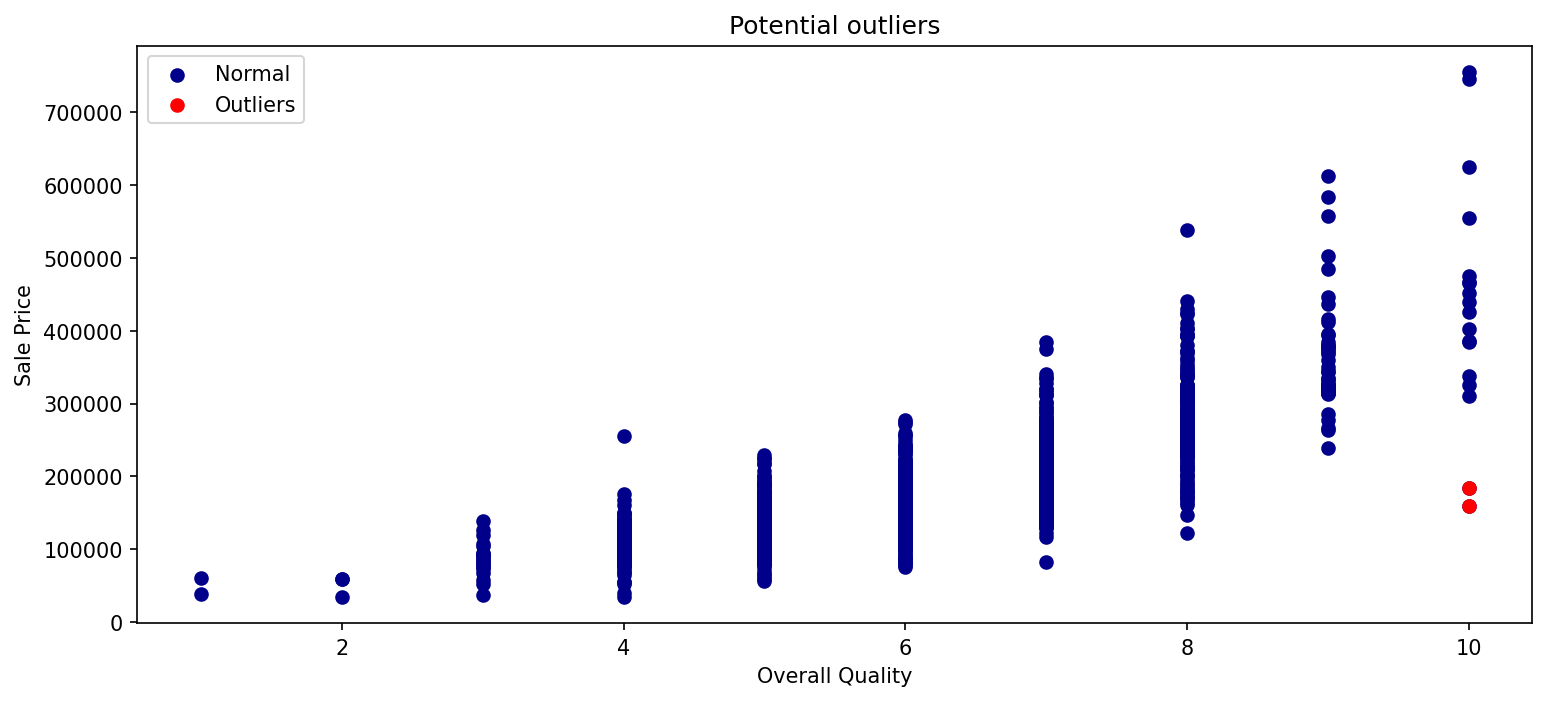

In [27]:
# Scatter plot with highlighted outliers
plt.figure(figsize=(12,5), dpi=150)

plt.scatter(df['OverallQual'], df['SalePrice'], color='darkblue', label='Normal')
plt.scatter(potential_outliers['OverallQual'], potential_outliers['SalePrice'], color='red', label='Outliers')

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

plt.title('Potential outliers')

plt.legend()

In [28]:
ind_outl_qual = df[(df['OverallQual'] ==10) & (df['SalePrice']<200000)].index

Text(0.5, 1.0, 'Corr between GrLivArea and Sale Price')

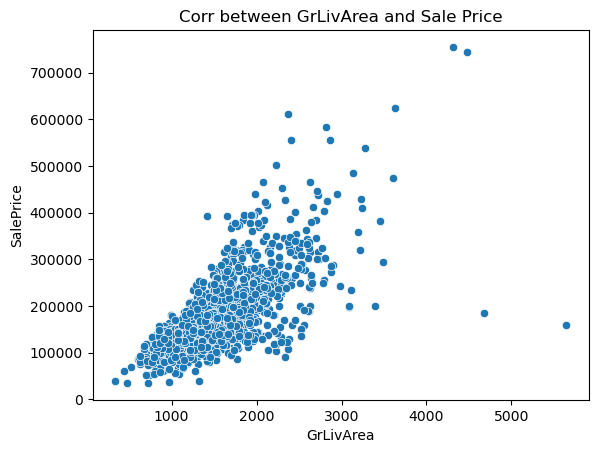

In [31]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('Corr between GrLivArea and Sale Price')

In [32]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]
# Identify potential outliers: points with GrLivArea > 4000 and SalePrice < 200000
# The points are same as the previous ones

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [35]:
outliers_grlivarea = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

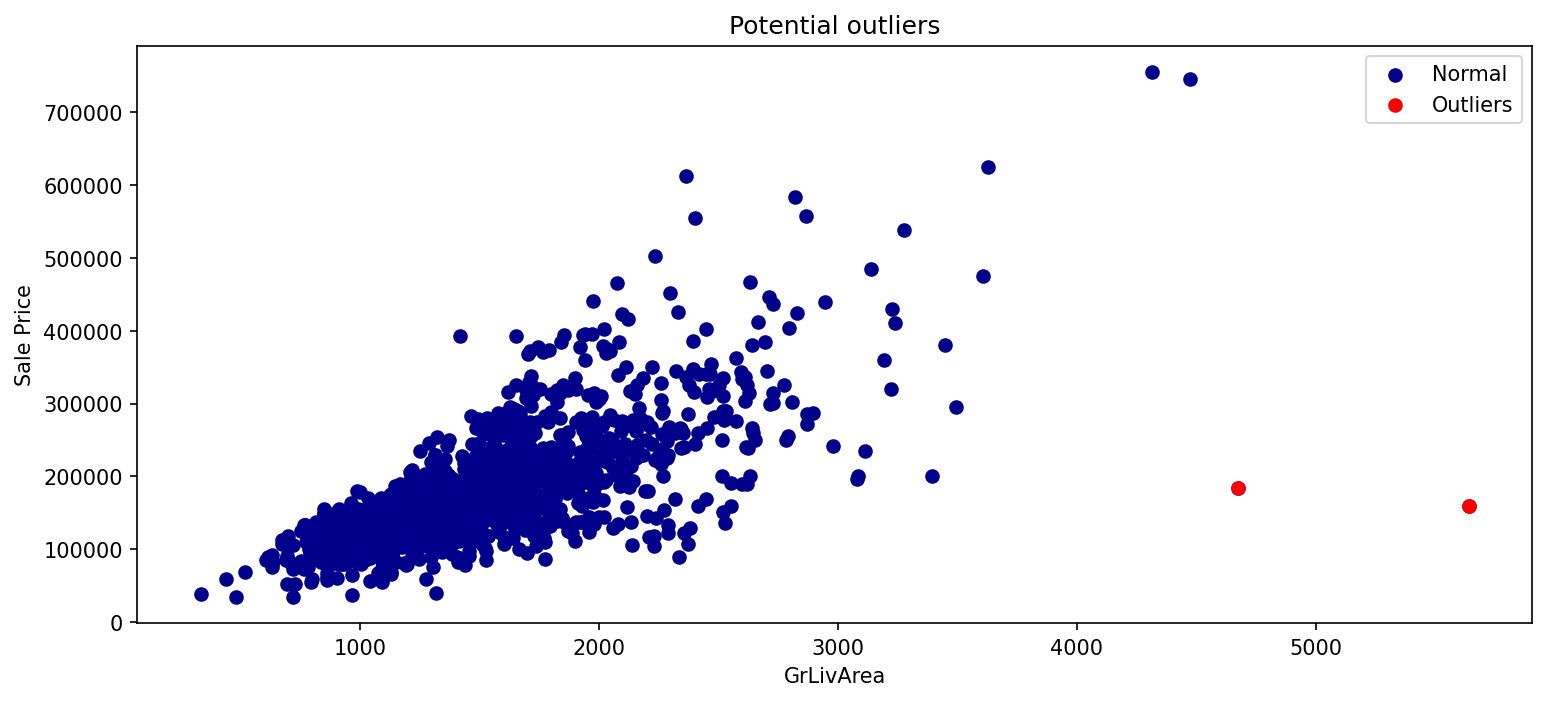

In [37]:
# Scatter plot with highlighted outliers
plt.figure(figsize=(12, 5), dpi =150)

plt.scatter(df['GrLivArea'], df['SalePrice'], color='darkblue', label='Normal')
plt.scatter(outliers_grlivarea['GrLivArea'], outliers_grlivarea['SalePrice'], color='red', label='Outliers')

plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')

plt.title('Potential outliers')
plt.legend()

In [38]:
ind_outl_grlivarea = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

## 3. Preprocessing

### 3.1 Missing Data

In [43]:
#Function to count missing values in percentage

def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result

In [45]:
percent_nan = percent_missing(df)

In [47]:
percent_nan

Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Data')

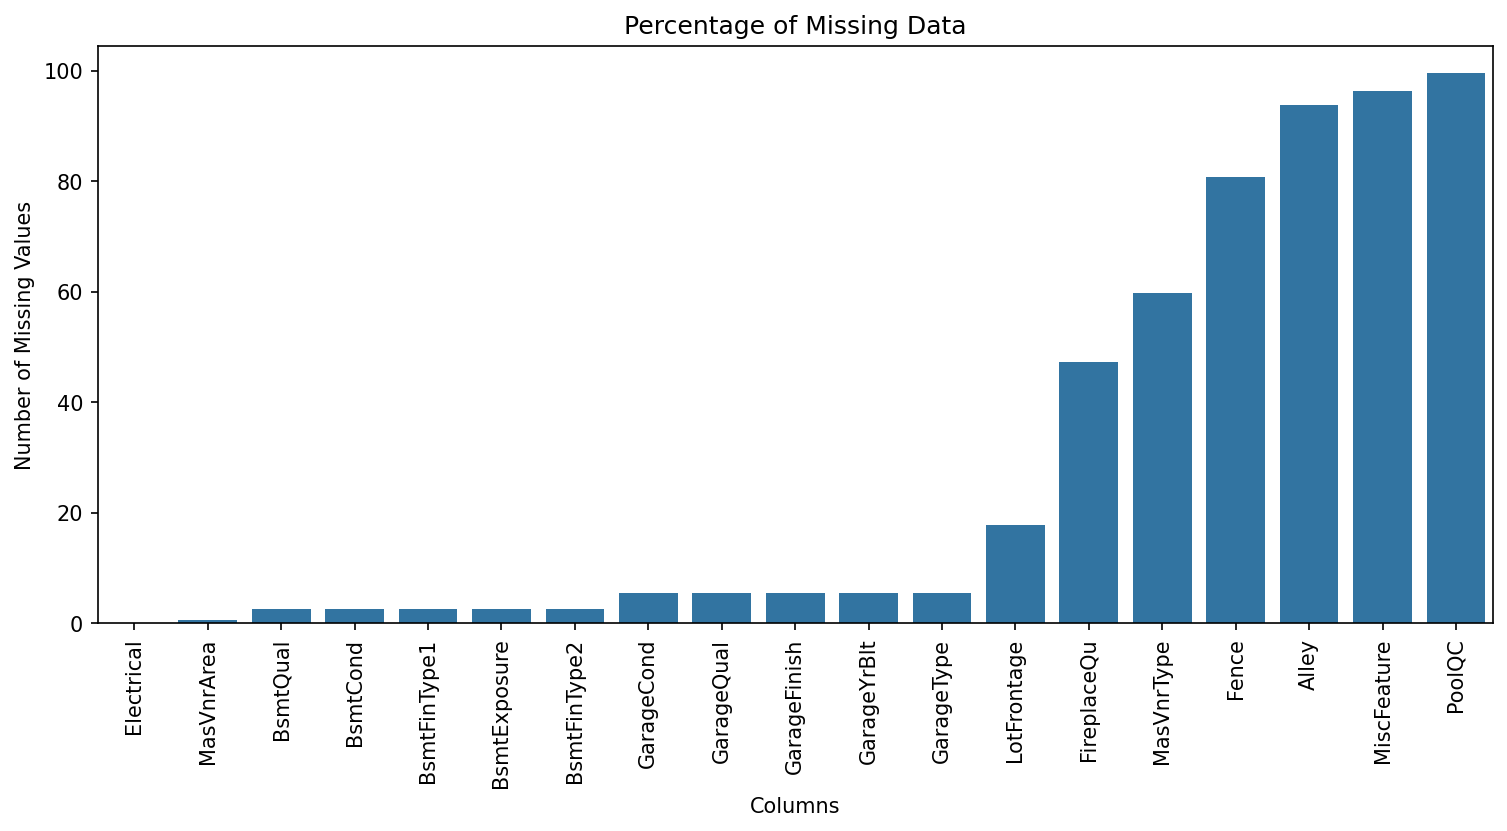

In [49]:
plt.figure(figsize=(12, 5), dpi=150)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Percentage of Missing Data')

(0.0, 10.0)

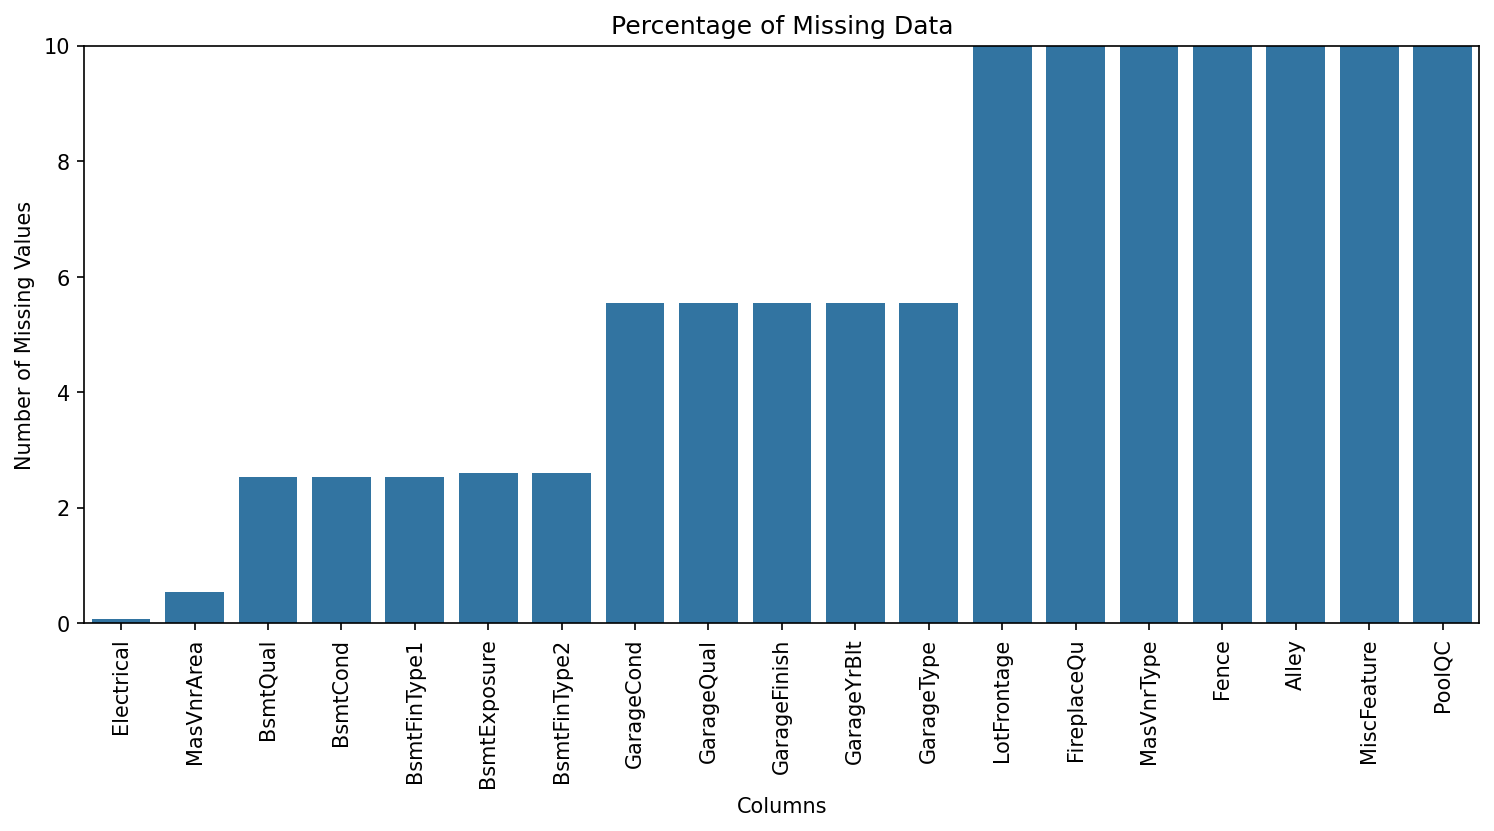

In [50]:
plt.figure(figsize=(12, 5), dpi=150)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Percentage of Missing Data')

plt.ylim(0,10)

In [52]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


#№ 3.2 Data Preprocessing & Feature Engineering


In [56]:
df_clean = df.copy() 

In [58]:
df_clean = df_clean.drop(ind_outl_qual, axis=0)

In [60]:
df_clean = df_clean.drop(df[df['Electrical'].isnull()].index, axis =0)

In [62]:
df_clean[df_clean['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [64]:
# Handle missing values in masonry veneer area (MasVnrArea)
# NaN values represent houses with no masonry veneer → replace with 0
df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)

In [66]:
bsml_qual_missing_indx = df_clean[df_clean['BsmtQual'].isnull()].index

In [68]:
bsml_qual_missing_indx

Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,  520,
        532,  533,  553,  646,  705,  736,  749,  778,  868,  894,  897,  984,
       1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321,
       1412],
      dtype='int64')

In [70]:
bsmt_cond_missing_indx = df_clean[df_clean['BsmtCond'].isnull()].index

In [72]:
# Indexes are the same
bsmt_cond_missing_indx

Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,  520,
        532,  533,  553,  646,  705,  736,  749,  778,  868,  894,  897,  984,
       1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321,
       1412],
      dtype='int64')

In [74]:
# NaN values represent houses with no basement → replace with 0
df_clean['BsmtQual'] = df_clean['BsmtQual'].fillna(0)

In [76]:
df_clean['BsmtCond'] = df_clean['BsmtCond'].fillna(0)

In [78]:
df_clean['BsmtFinType1'] = df_clean['BsmtFinType1'].fillna(0)

In [80]:
df_clean['BsmtFinType2'] = df_clean['BsmtFinType2'].fillna(0)

In [82]:
df_clean['BsmtExposure'] = df_clean['BsmtExposure'].fillna(0)

In [84]:
percent_nan = percent_missing(df_clean)

In [86]:
percent_nan

GarageType       5.559369
GarageYrBlt      5.559369
GarageFinish     5.559369
GarageQual       5.559369
GarageCond       5.559369
LotFrontage     17.776253
FireplaceQu     47.288950
MasVnrType      59.780371
Fence           80.713795
Alley           93.754290
MiscFeature     96.293754
PoolQC          99.588195
dtype: float64

In [88]:
# NaN values represent houses with no Garage → replace with None
gar_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
df_clean[gar_columns] = df_clean[gar_columns].fillna('None')

In [90]:
percent_nan = percent_missing(df_clean)

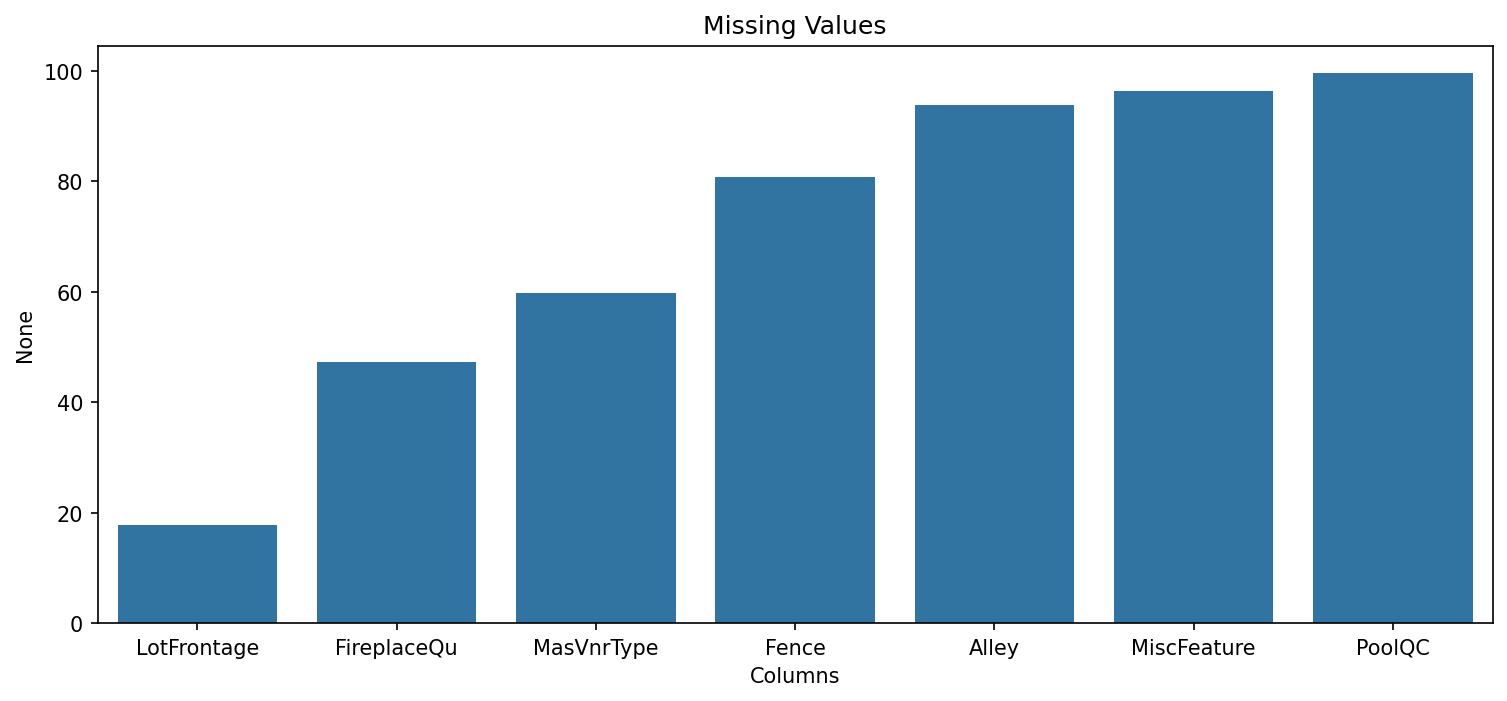

In [92]:
plt.figure(figsize=(12,5), dpi=150)

sns.barplot(x=percent_nan.index, y=percent_nan)

plt.xlabel('Columns')
plt.title('Missing Values');

In [93]:
# NaN values represent houses with no Pool → replace with None
df_clean['PoolQC'] = df_clean['PoolQC'].fillna('None')

In [96]:
# NaN values represent houses with no Miscellaneous Features → replace with None
df_clean['MiscFeature'] = df_clean['MiscFeature'].fillna('None')

In [98]:
# NaN values represent houses with no No alley access → replace with None
df_clean['Alley'] = df_clean['Alley'].fillna('None')

In [100]:
# NaN values represent houses with no Fence → replace with None
df_clean['Fence'] = df_clean['Fence'].fillna('None')

In [102]:
# NaN values represent houses with no Masonry → replace with None
df_clean['MasVnrType'] = df_clean['MasVnrType'].fillna('None')

In [104]:
# NaN values represent houses with no Fireplace → replace with None
df_clean['FireplaceQu'] = df_clean['FireplaceQu'].fillna('None')

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

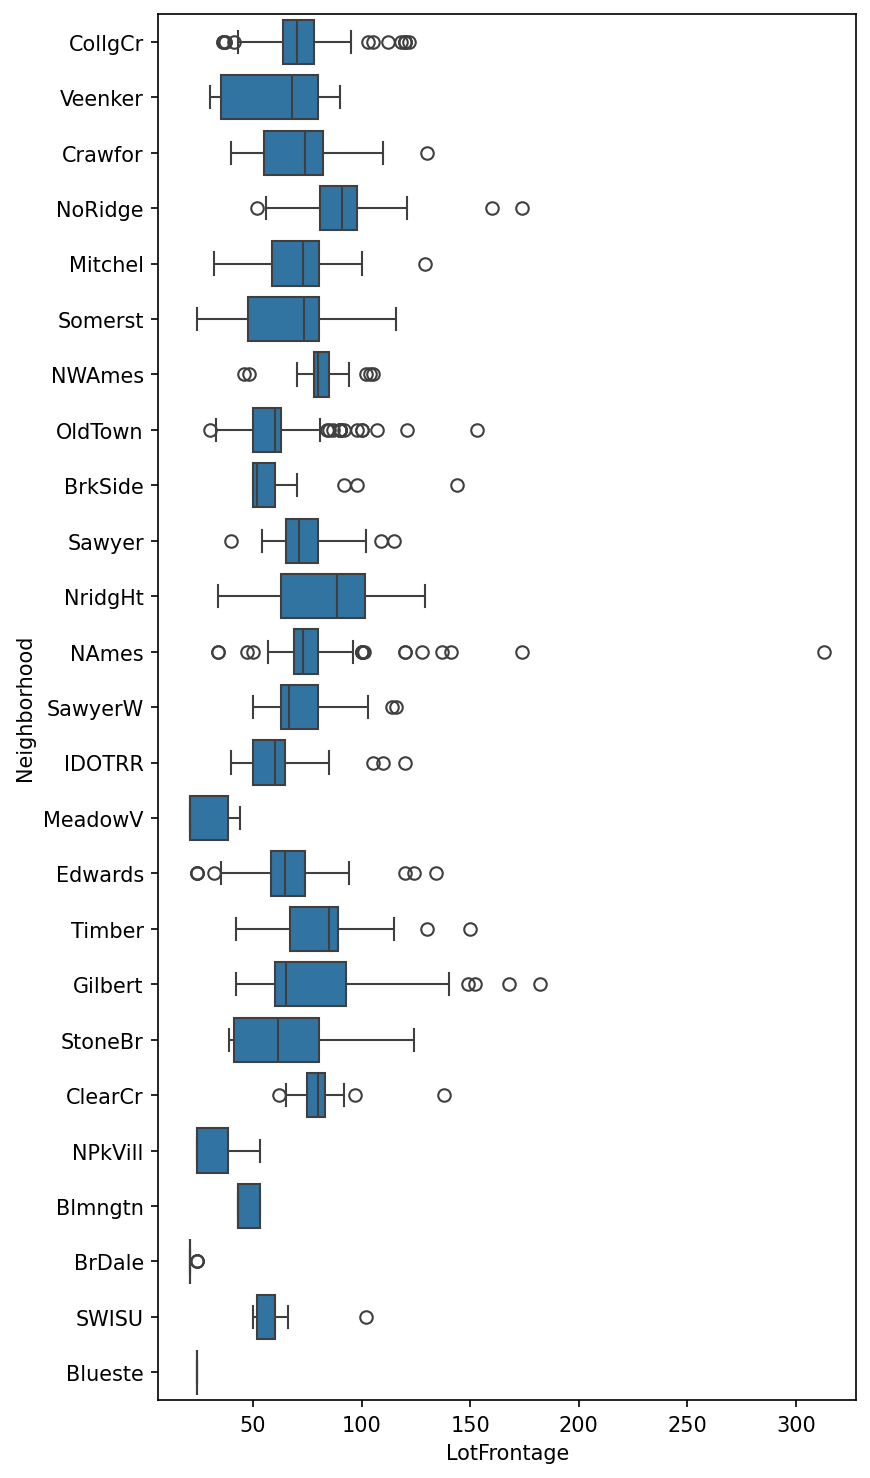

In [106]:
plt.figure(figsize=(6,12), dpi=150)
sns.boxplot(data=df_clean, x='LotFrontage', y='Neighborhood')

In [107]:
df_clean.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [108]:
df_clean['LotFrontage'] = df_clean.groupby('Neighborhood')['LotFrontage'].transform(\
                            lambda v: v.fillna(v.mean())\
                            )

In [112]:
df_clean.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## 3.3 Categorical Variable Encoding

In [115]:
# Convert numeric columns to categorical where numeric values represent categories
# Example: MSSubClass (building class) has numeric codes but is actually categorical
# We convert to string to prevent sklearn from treating them as ordinal numbers
df_clean['MSSubClass'] = df_clean['MSSubClass'].apply(str)

In [117]:
object_df = df_clean.select_dtypes(include='object')

In [119]:
numeric_df = df_clean.select_dtypes(exclude='object')

In [121]:
df_object_dummies = pd.get_dummies(object_df, drop_first=True)

In [123]:
final_df = pd.concat([numeric_df, df_object_dummies], axis=1)

In [125]:
final_df.corr(numeric_only=True)['SalePrice'].sort_values()

ExterQual_TA       -0.589947
KitchenQual_TA     -0.520124
FireplaceQu_None   -0.472413
BsmtQual_TA        -0.453018
GarageFinish_Unf   -0.411144
                      ...   
GarageCars          0.641111
TotalBsmtSF         0.651553
GrLivArea           0.734962
OverallQual         0.795863
SalePrice           1.000000
Name: SalePrice, Length: 369, dtype: float64

## 4. Train Split

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score

In [130]:
X = final_df.drop('SalePrice', axis=1)

In [132]:
y = final_df['SalePrice']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Modeling 

In [137]:
from sklearn.pipeline import Pipeline

In [152]:
from sklearn.preprocessing import StandardScaler

In [154]:
from sklearn.linear_model import Ridge

In [156]:
pipeline = Pipeline([
    ('saler', StandardScaler()),
    ('model', Ridge())
])

In [158]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [160]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('saler', StandardScaler()), ('model', Ridge())])

In [162]:
y_pred = pipeline.predict(X_test)

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [166]:
MAE = mean_absolute_error(y_test, y_pred)

In [168]:
MAE

18796.387874446427

In [170]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [172]:
RMSE

26213.69774822291

## 6. Model Optimization and Evaluation

### log transformation

In [222]:
X = final_df.drop('SalePrice', axis=1)

In [224]:
y = np.log(final_df['SalePrice'])

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [230]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('saler', StandardScaler()), ('model', Ridge())])

In [232]:
y_pred = np.exp(pipeline.predict(X_test))

In [238]:
mean_absolute_error(np.exp(y_test), y_pred)

15183.646615671829

In [242]:
np.sqrt(mean_squared_error(np.exp(y_test), y_pred))

21350.26615960077

### RidgeCV

In [246]:
from sklearn.linear_model import RidgeCV

In [252]:
model_ridgecv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)

In [254]:
model_ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-0...
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
        cv=5)

In [260]:
model_ridgecv.alpha_

19.306977288832496

In [262]:
ridgecv_pred = model_ridgecv.predict(X_test)

In [276]:
y_pred_original = np.expm1(ridgecv_pred)

In [278]:
y_test_original = np.expm1(y_test)

In [280]:
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

In [282]:
print(f"MAE: ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"Avg price: ${y_test_original.mean():,.0f}")
print(f"Error %: {rmse / y_test_original.mean() * 100:.1f}%")

MAE: $13,852
RMSE: $19,001
Avg price: $184,406
Error %: 10.3%
